# Project: Gender Classification using Logistic Regression
### Predict the person gender based on their weight and height using Logistic regression model

![Logistic_reg](https://user-images.githubusercontent.com/67468718/105578429-0d235000-5d35-11eb-9afa-505d657abfd8.JPG)

## 1. Introduction: 

**Logistic regression** is a *supervised learning classification algorithm* used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.
Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.
Here , we use the Logistic regression model to predict the gender(Male/Female) of the person based on their weight and height .
The data set contains three columns
  * Height in inches
  * Weight in pounds
  * Gender (Male/Female) of the person

## 2. Import relevant libraries

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import requests
from sb_utils import save_file

## 3. Load the data

In [3]:
# Let's grap the dataset from github:
url = 'https://raw.githubusercontent.com/cs109/2015lab5/master/data/01_heights_weights_genders.csv'
res = requests.get(url, allow_redirects=True)
with open('01_heights_weights_genders.csv','wb') as file:
    file.write(res.content)
df = pd.read_csv('01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#let's see the shape of df:
df.shape

(10000, 3)

In [5]:
# main info about df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
#let's view the statistical summary of df:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [7]:
# Top rows of the Data:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## 4. Visualization & Feature Engineering:

#### Let's explore the correlations and see which features separate the Male\Femals populations:

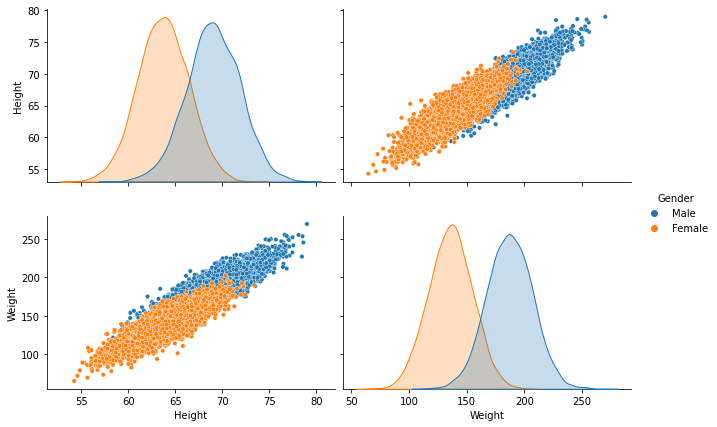

In [8]:
ax = sns.pairplot(df[['Height','Weight','Gender']],hue='Gender', height=3, aspect=1.5, palette="tab10", plot_kws = {"s":20})
plt.subplots_adjust(hspace=0.2)
#ax = ax.map_diag(plt.hist)


Text(0.5, 1.0, 'Gender Correlation')

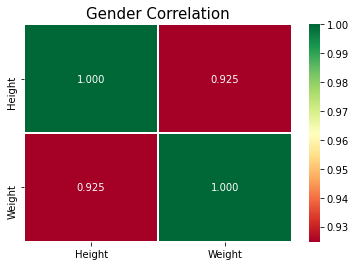

In [9]:
# Make a heatmap of the data 
sns.heatmap(df.corr(), linewidths=.4, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('Gender Correlation', fontsize=15)

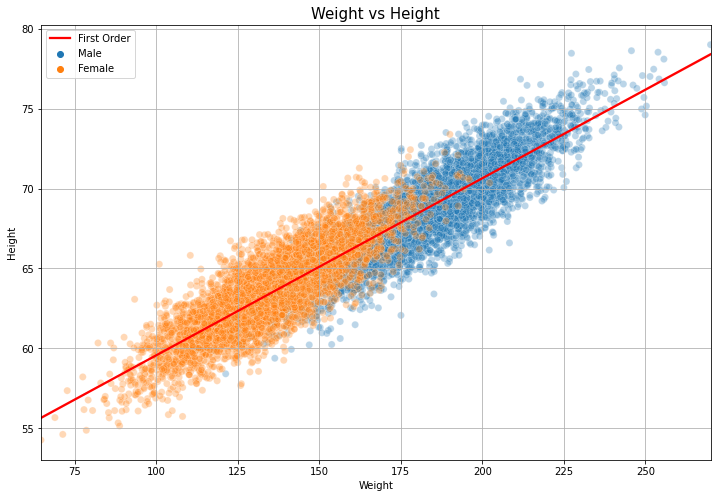

In [10]:
# Plot Weight vs. Height:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='Weight',y='Height',data=df, hue='Gender', s=50, marker="o", alpha=0.3)
# The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again:
sns.regplot(x='Weight', y='Height', data=df, scatter=None, color='red', label='First Order')
# Plot in green a linear regression of order 2 between 'density' and 'fixed.acidity':
#sns.regplot(x='Weight', y='Height', data=dflog, scatter=None, order=2, color='green', label='Second Order')
ax.set_title('Weight vs Height', fontsize=15)
plt.legend(loc='upper left')
plt.grid(True)

#### Clear correlation between Height & Weight unsurprisingly!!!

## 5. Training and Test Datasets

When fitting models, we would like to ensure two things:

* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.

<br/>
<div class="span5 alert alert-success">
<h4>Purpose of splitting data into Training/testing sets</h4>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

**First, we try a basic Logistic Regression:**

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [11]:
# Create arrays for the features and the response variable
X = df[['Height','Weight']].values #features
y = (df.Gender == "Male").values  # response variable

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Create a classifier: logreg
logreg = LogisticRegression()

# Fit the model on the trainng data.
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Print the accuracy from the testing data.
print("Basic Logistic Regression Accuracy Score: {}" .format(accuracy_score(y_pred, y_test)))

Basic Logistic Regression Accuracy Score: 0.9252


## 6. Tuning the Model

The model has some hyperparameters we can tune for hopefully better performance. For tuning the parameters of your model, you will use a mix of **cross-validation** and **grid search**. In Logistic Regression, the most important parameter to tune is the **regularization parameter** $C$. Note that the regularization parameter is not always part of the logistic regression model. 

**regularization parameter** $C$ is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse, as a method of feature selection.

#### Let's use 2 methods to perform model tuning and selecting the regularization parameter $C$:
  1. Writing our own loops to iterate over the model parameters
  2. Using **GridSearchCV** to find the best model

We use the following `cv_score` function to perform K-fold cross-validation and apply a scoring function to each test fold. In this incarnation we use accuracy score as the default scoring function.

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(logreg, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        logreg.fit(x[train], y[train]) # fit
        result += score_func(logreg.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

Below is an example of using the `cv_score` function for a basic logistic regression model without regularization.

In [13]:
logreg = LogisticRegression()
score = cv_score(logreg, X_train, y_train)
print("Basic Logistic Regression (Unregularized): {:0.4f}" .format(score))

Basic Logistic Regression (Unregularized): 0.9172


#### 1. Hyperparameter tuning with a loop:

In [14]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# loop:
max_score = 0

for C in Cs:
        logreg = LogisticRegression(C=C)
        score = cv_score(logreg, X_train, y_train)
        print("C : {}, Corresponding cross validation score : {:0.4f}".format(C, score))
        if score > max_score:
            max_score = score
            best_C =C
print(' ')
print("Best C : {}, Corresponding to the Max cross validation score : {:0.4f}".format(best_C, max_score))

C : 0.001, Corresponding cross validation score : 0.9123
C : 0.1, Corresponding cross validation score : 0.9172
C : 1, Corresponding cross validation score : 0.9172
C : 10, Corresponding cross validation score : 0.9172
C : 100, Corresponding cross validation score : 0.9172
 
Best C : 0.1, Corresponding to the Max cross validation score : 0.9172


#### Now let's visualize the impact of Regularization:

(-0.5, 2.0)

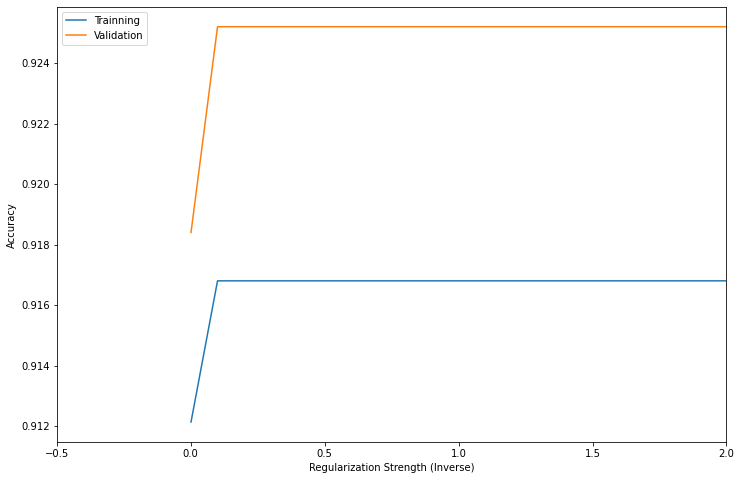

In [15]:
trainning = []
validation = []
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

for C in Cs:
    clf = LogisticRegression(C= C )
    clf.fit(X_train, y_train)
    trainning.append(clf.score(X_train,y_train))
    validation.append(clf.score(X_test,y_test))
plt.figure(figsize=(12, 8))    
plt.plot(Cs,trainning)
plt.plot(Cs,validation)
plt.legend(['Trainning','Validation'])
plt.xlabel('Regularization Strength (Inverse)')
plt.ylabel('Accuracy')
plt.xlim([-.5, 2])

#### Now let's estimate how this model will predict on unseen data in the following way:
   * Use the $C$ we obtained from the procedure earlier and train a Logistic Regression on the training data
   * Calculate the accuracy on the test data

In [16]:
# Create a classifier: logreg
logreg = LogisticRegression(C=best_C)

# Fit the model on the trainng data.
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Print the accuracy from the testing data.
print("Logistic Regression Accuracy Score (Regularized): {}" .format(accuracy_score(y_test, y_pred)))

Logistic Regression Accuracy Score (Regularized): 0.9252


#### 2. Hyperparameter tuning using **GridSearchCV**

In [17]:
#let's import GridSearchCV:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
Cs = [0.001, 0.1, 1, 10, 100]
params_grid = {'C':Cs}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, params_grid, cv=5)

# Fit it to the data:
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print(' ')
print("Best score is {:0.4f}".format(logreg_cv.best_score_))



Tuned Logistic Regression Parameters: {'C': 1}
 
Best score is 0.9168


In [18]:
# Now let's apply Tuned Logistic Regression Parameters: {'C': 1}:
logreg = LogisticRegression(C=1)

# Fit the model on the trainng data.
logreg.fit(X_train, y_train)

# let's predict in X_test:
y_pred = logreg.predict(X_test)

# Print the accuracy from the testing data.
print("Logistic Regression Accuracy Score: {:0.4f}" .format(accuracy_score(y_test, y_pred)))
print(' ')
print(confusion_matrix(y_test, y_pred))
print(' ')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy Score: 0.9252
 
[[1146   86]
 [ 101 1167]]
 
              precision    recall  f1-score   support

       False       0.92      0.93      0.92      1232
        True       0.93      0.92      0.93      1268

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500



## 7. Model Performance:

In [19]:
print(df[df['Gender'] == 'Male'].head())
print(' ')
print(df[df['Gender'] == 'Female'].head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
 
      Gender     Height      Weight
5000  Female  58.910732  102.088326
5001  Female  65.230013  141.305823
5002  Female  63.369004  131.041403
5003  Female  64.479997  128.171511
5004  Female  61.793096  129.781407


In [20]:
#Let’s see how well the model does in predicting the Gender
pre = logreg.predict([(73.847017, 241.893563), (69.881796, 206.349801), (58.910732, 102.088326), (65.230013, 141.305823)])
print(pre)

[ True  True False False]


#### As you can see above, our Model predicted the Gender accurately!!! 

## 8. Save the dataset 'df':

In [ ]:
# Save the data: df

datapath = 'path/Logistic_Regression_Advanced/Datasets'
save_file(df, 'df.csv', datapath)